In [1]:
import numpy as np 
import torch 
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt

In [2]:
%%capture

from extractor import get_dataset

path = 'dataset/games.pgn'
num_games = 2000
device ='cuda'

X, Y = get_dataset(path, num_games=num_games, device=device)

In [3]:
X.shape, Y.shape

(torch.Size([156961, 773]), torch.Size([156961]))

In [4]:
def view_matrix(x):
    img = torch.zeros((784))
    img[:x.shape[0]] = x.to(device).detach().clone()
    plt.imshow(img.view(28,28),cmap='gray')

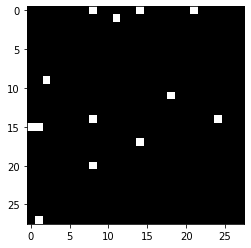

In [5]:
view_matrix(X[69])

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(773,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,100)
        )

        self.decoder = nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,773),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        return self.decoder(x)


In [7]:
dataset = TensorDataset(X,Y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [8]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [9]:
track = X[0].view(1,-1).detach()
track.shape

torch.Size([1, 773])

In [10]:
epochs = 10
outputs = []
losses = []

for epoch in range(epochs):
    running_loss = 0
    for batch, (x, _) in enumerate(loader):
        out = model(x)
        loss = criterion(out,x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch % (num_games//10) == (num_games//10) - 1:
            print(f'[{epoch + 1}, {batch + 1:5d}] loss: {running_loss / (num_games//10):.3f}')
            running_loss = 0.0
    losses.append(running_loss)
    outputs.append(model(track))
print('finished_training')


[1,   200] loss: 0.248
[1,   400] loss: 0.246
[1,   600] loss: 0.244
[1,   800] loss: 0.241
[1,  1000] loss: 0.238
[1,  1200] loss: 0.234
[1,  1400] loss: 0.228
[1,  1600] loss: 0.217
[1,  1800] loss: 0.191
[1,  2000] loss: 0.107
[1,  2200] loss: 0.033
[1,  2400] loss: 0.026
[2,   200] loss: 0.025
[2,   400] loss: 0.025
[2,   600] loss: 0.024
[2,   800] loss: 0.024
[2,  1000] loss: 0.024
[2,  1200] loss: 0.024
[2,  1400] loss: 0.024
[2,  1600] loss: 0.024
[2,  1800] loss: 0.024
[2,  2000] loss: 0.024
[2,  2200] loss: 0.024
[2,  2400] loss: 0.024
[3,   200] loss: 0.024
[3,   400] loss: 0.024
[3,   600] loss: 0.023
[3,   800] loss: 0.023
[3,  1000] loss: 0.023
[3,  1200] loss: 0.023
[3,  1400] loss: 0.023
[3,  1600] loss: 0.023
[3,  1800] loss: 0.023
[3,  2000] loss: 0.023
[3,  2200] loss: 0.023
[3,  2400] loss: 0.023
[4,   200] loss: 0.023
[4,   400] loss: 0.023
[4,   600] loss: 0.023
[4,   800] loss: 0.023
[4,  1000] loss: 0.023
[4,  1200] loss: 0.023
[4,  1400] loss: 0.023
[4,  1600] 

In [11]:
outputs[0].shape, track.shape

(torch.Size([1, 773]), torch.Size([1, 773]))

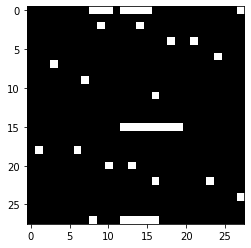

In [12]:
view_matrix(track[0])

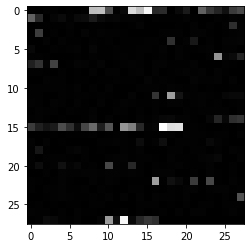

In [13]:
view_matrix(outputs[1][0])

In [14]:
e1 = model.encoder
e2 = model.encoder

In [15]:
a, b = X[0], X[1]
a, b = e1(a), e2(b)
r = torch.cat((a,b),dim=0)
r.shape

torch.Size([200])

In [16]:
class DeepChess(nn.Module):
    def __init__(self):
        super().__init__()
        self.e = model.encoder
        self.fc1 = nn.Linear(200,100)
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = DeepChess().to(device) 

In [17]:
loader1 = DataLoader(dataset,batch_size=64,shuffle=True)
loader2 = DataLoader(dataset,batch_size=64,shuffle=True)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.1)

In [19]:
a = torch.rand((64,773),device=device)
b = torch.rand((64,773),device=device)
a = model.encoder(a)
b = model.encoder(b)
c = torch.cat((a,b),-1)
c.shape

torch.Size([64, 200])

In [20]:
a = net.e[0].weight.detach().clone()
a

tensor([[ 0.0134,  0.0292, -0.0316,  ...,  0.0016,  0.0216, -0.0324],
        [-0.0216,  0.0085,  0.0128,  ...,  0.0234, -0.0255,  0.0167],
        [-0.0248, -0.0063, -0.0276,  ..., -0.0254, -0.0251, -0.0234],
        ...,
        [-0.0181,  0.0002,  0.0182,  ...,  0.0224, -0.0209, -0.0074],
        [-0.0082, -0.0017,  0.0135,  ..., -0.0296, -0.0184,  0.0207],
        [-0.0341,  0.0236, -0.0180,  ...,  0.0160, -0.0205, -0.0197]],
       device='cuda:0')

In [21]:
epochs = 20
losses = []

for epoch in range(epochs):
    running_loss = 0
    for batch, (data1, data2) in enumerate(zip(loader1,loader2)):
        x1, y1 = data1
        x2, y2 = data2
        x1 = net.e(x1)
        x2 = net.e(x2)
        x = torch.cat((x1,x2),-1) 
        pred = net(x)
        
        target = torch.tensor(torch.stack((y1,y2),dim=1))
        loss = criterion(pred, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if batch % (num_games//10) == (num_games//10) - 1:
            print(f'[{epoch + 1}, {batch + 1:5d}] loss: {running_loss / (num_games//10):.3f}')
            running_loss = 0.0
    
    losses.append(running_loss)

print('finished_training')


/tmp/ipykernel_10101/1446901922.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(torch.stack((y1,y2),dim=1))


[1,   200] loss: 0.739
[1,   400] loss: 0.749
[1,   600] loss: 0.748
[1,   800] loss: 0.744
[1,  1000] loss: 0.743
[1,  1200] loss: 0.741
[1,  1400] loss: 0.748
[1,  1600] loss: 0.747
[1,  1800] loss: 0.742
[1,  2000] loss: 0.746
[1,  2200] loss: 0.741
[1,  2400] loss: 0.741
[2,   200] loss: 0.743
[2,   400] loss: 0.739
[2,   600] loss: 0.733
[2,   800] loss: 0.729
[2,  1000] loss: 0.716
[2,  1200] loss: 0.712
[2,  1400] loss: 0.689
[2,  1600] loss: 0.668
[2,  1800] loss: 0.660
[2,  2000] loss: 0.652
[2,  2200] loss: 0.635
[2,  2400] loss: 0.619
[3,   200] loss: 0.600
[3,   400] loss: 0.587
[3,   600] loss: 0.564
[3,   800] loss: 0.556
[3,  1000] loss: 0.562
[3,  1200] loss: 0.535
[3,  1400] loss: 0.537
[3,  1600] loss: 0.527
[3,  1800] loss: 0.525
[3,  2000] loss: 0.521
[3,  2200] loss: 0.517
[3,  2400] loss: 0.514
[4,   200] loss: 0.516
[4,   400] loss: 0.500
[4,   600] loss: 0.506
[4,   800] loss: 0.495
[4,  1000] loss: 0.494
[4,  1200] loss: 0.486
[4,  1400] loss: 0.496
[4,  1600] 